<a href="https://colab.research.google.com/github/abhisheshgupta/abhisheshgupta/blob/main/Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

####data loading and reading

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/CarPrice_Assignment.csv')

In [ ]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
df.shape

(205, 26)

In [ ]:
cat = df.select_dtypes(include='O')

In [ ]:
num = df.select_dtypes(include=np.number)

#Exploratory Data Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
df.describe(include='all')

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205,205,205,205,205,205,205,205.000000,...,205.000000,205,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
unique,NaN,NaN,147,2,2,2,5,3,2,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,toyota corona,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,6,185,168,115,96,120,202,NaN,...,NaN,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,103.000000,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000


###Histplot

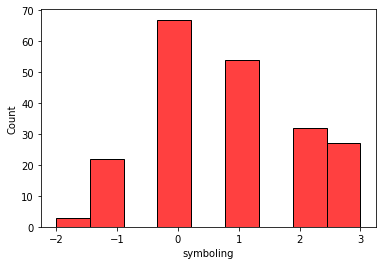

In [ ]:
sns.histplot(df['symboling'],color='red')

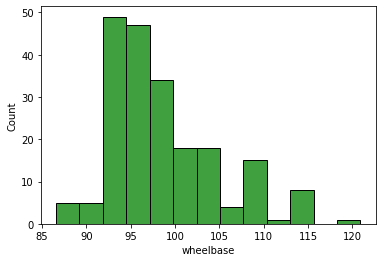

In [ ]:
sns.histplot(df['wheelbase'],color='green')

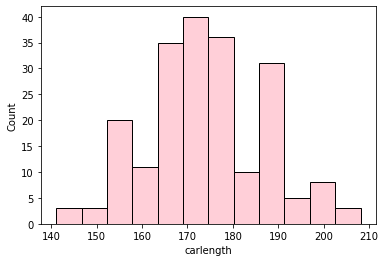

In [ ]:
sns.histplot(df['carlength'],color='pink')

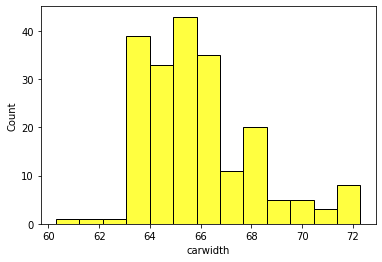

In [ ]:
sns.histplot(df['carwidth'],color='yellow')

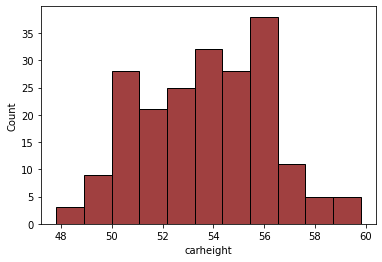

In [ ]:
sns.histplot(df['carheight'],color='maroon')

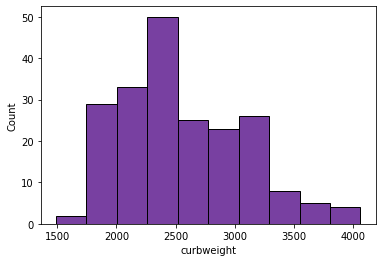

In [ ]:
sns.histplot(df['curbweight'],color='indigo')

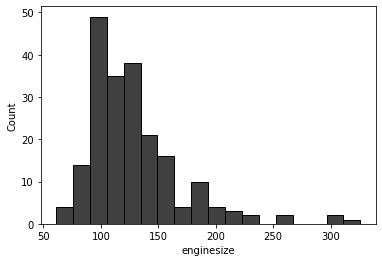

In [ ]:
sns.histplot(df['enginesize'],color='black')

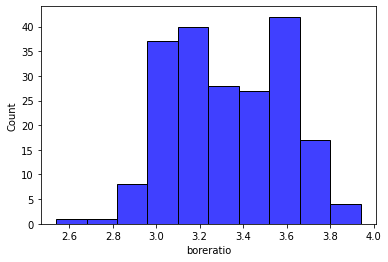

In [ ]:
sns.histplot(df['boreratio'],color='blue')

###Countplot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


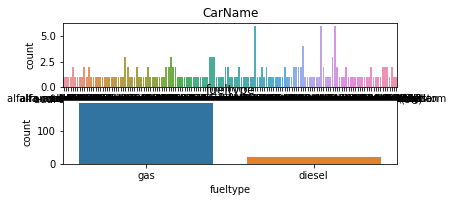

In [ ]:
plt.subplot(311)
sns.countplot(df['CarName'])
plt.title('CarName')
plt.subplot(312)
sns.countplot(df['fueltype'])
plt.title('fueltype')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

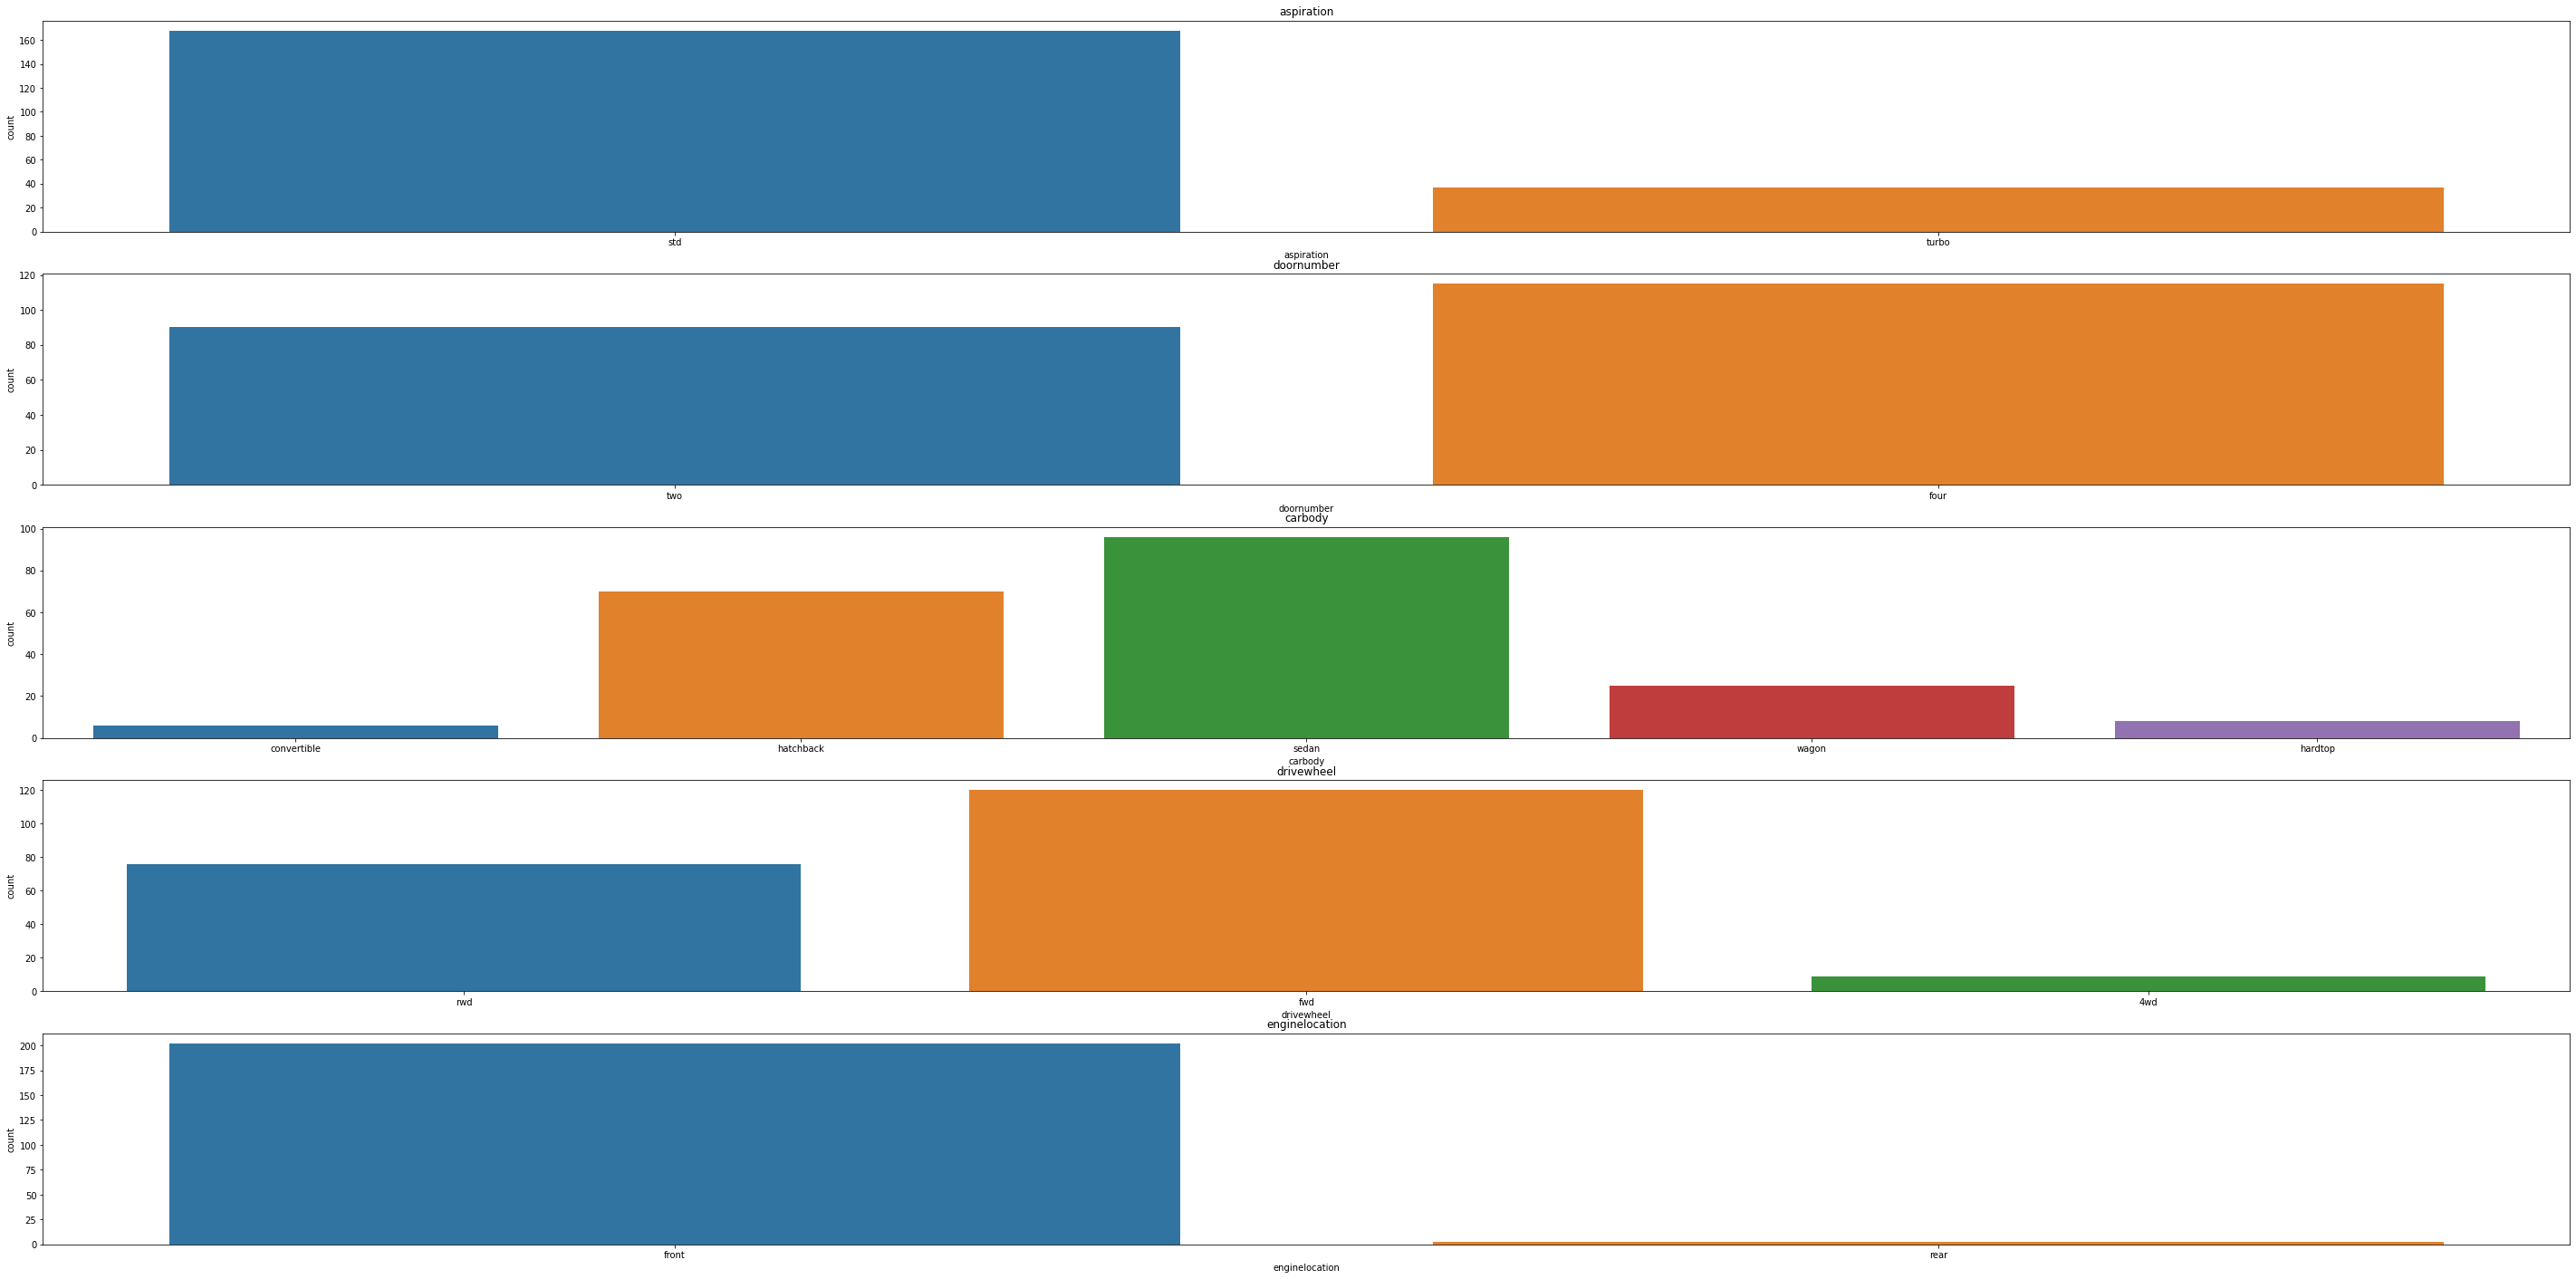

In [ ]:

plt.figure(figsize=(50,30))
plt.subplot(611)
sns.countplot(df['aspiration'])
plt.title('aspiration')
plt.subplot(612)
sns.countplot(df['doornumber'])
plt.title('doornumber')
plt.subplot(613)
sns.countplot(df['carbody'])
plt.title('carbody')
plt.subplot(614)
sns.countplot(df['drivewheel'])
plt.title('drivewheel')
plt.subplot(615)
sns.countplot(df['enginelocation'])
plt.title('enginelocation')
plt.show()

###Boxplot

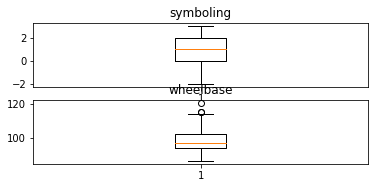

In [ ]:
plt.subplot(311)
plt.boxplot(df['symboling'])
plt.title('symboling')
plt.subplot(312)
plt.boxplot(df['wheelbase'])
plt.title('wheelbase')
plt.show()

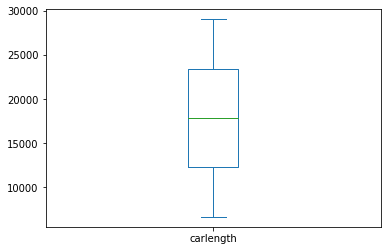

In [ ]:
df.groupby('aspiration')['carlength'].sum().plot(kind='box')
plt.show()

####pie chart

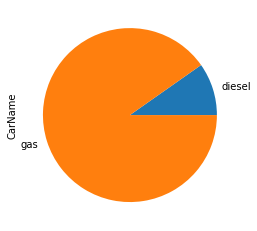

In [ ]:
df.groupby('fueltype')['CarName'].count().plot(kind='pie')

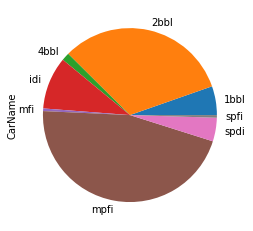

In [ ]:
df.groupby('fuelsystem')['CarName'].count().plot(kind='pie')

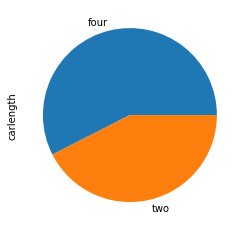

In [ ]:
df.groupby('doornumber')['carlength'].sum().plot(kind='pie')

###scatterplot

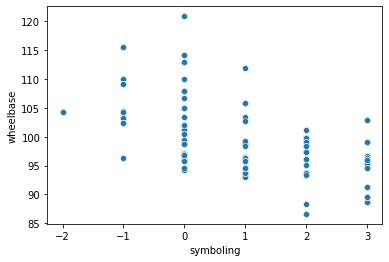

In [ ]:
sns.scatterplot(x='symboling',y='wheelbase',data=df)

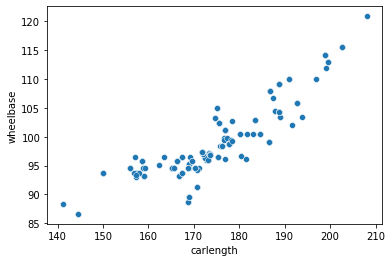

In [ ]:
sns.scatterplot(x='carlength',y='wheelbase',data=df)

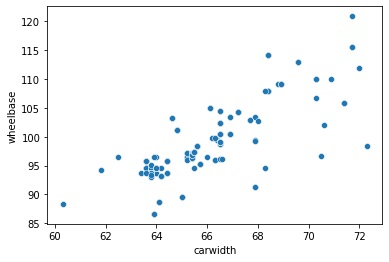

In [ ]:
sns.scatterplot(x='carwidth',y='wheelbase',data=df)

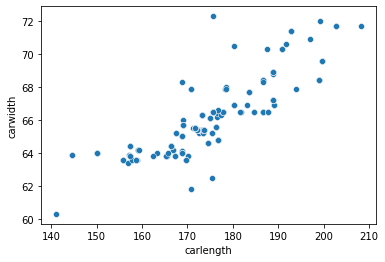

In [ ]:
sns.scatterplot(x='carlength',y='carwidth',data=df)

####bar plot

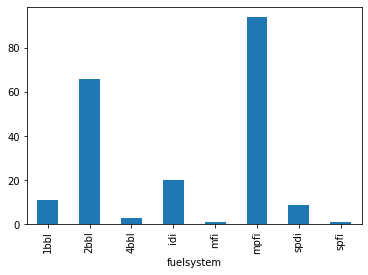

In [ ]:
df.groupby('fuelsystem')['carlength'].count().plot(kind='bar')
plt.show()

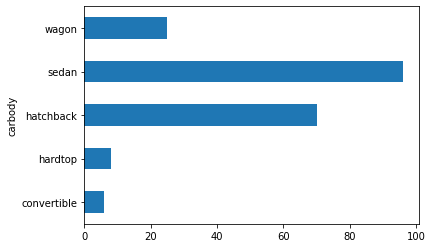

In [ ]:
df.groupby('carbody')['CarName'].count().plot(kind='barh')

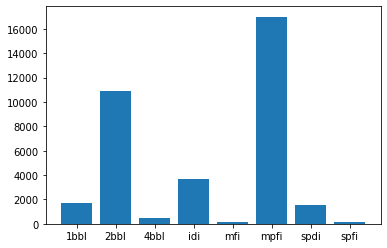

In [ ]:
summary = df.groupby('fuelsystem')['carlength'].sum()
plt.bar(x=summary.index,height=summary.values)
plt.show()

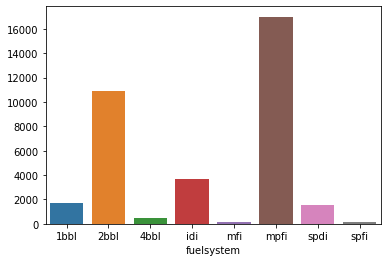

In [ ]:
sns.barplot(x=summary.index,y=summary.values)
plt.show()

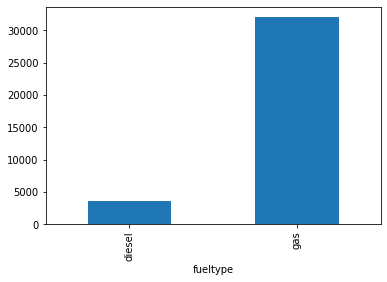

In [ ]:
df.groupby('fueltype')['carlength'].sum().plot(kind='bar')

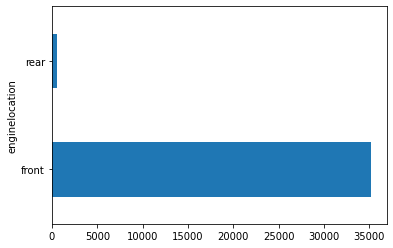

In [ ]:
df.groupby('enginelocation')['carlength'].sum().plot(kind='barh')

#####line chart

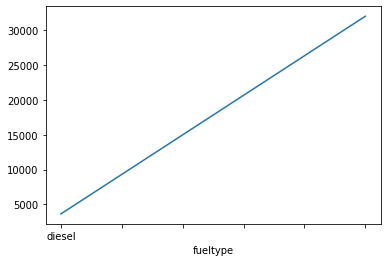

In [ ]:
df.groupby('fueltype')['carlength'].sum().plot(kind='line')
plt.show()

####area chart

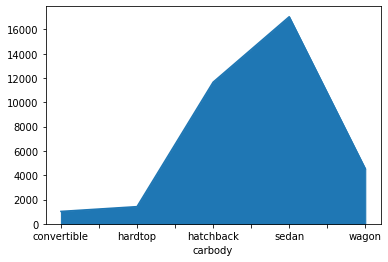

In [ ]:
df.groupby('carbody')['carlength'].sum().plot(kind='area')

###correlation matrix

In [ ]:
df.select_dtypes(['int64','float64']).corr()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,-0.151621,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093
symboling,-0.151621,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,0.129729,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.170636,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.052387,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.255960,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.071962,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.033930,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.260064,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.160824,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443


####cross tab

In [ ]:
pd.crosstab(df['doornumber'],df['enginetype'])

enginetype,dohc,dohcv,l,ohc,ohcf,ohcv,rotor
doornumber,,,,,,,
four,5,0,11,84,9,6,0
two,7,1,1,64,6,7,4


####heatmap

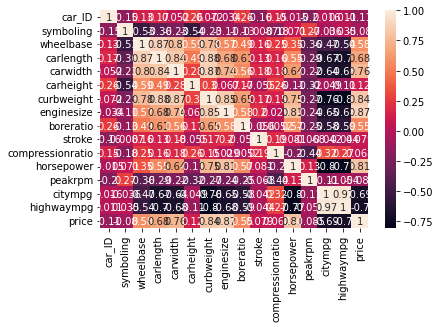

<Figure size 2160x1440 with 0 Axes>

In [ ]:
sns.heatmap(df.select_dtypes(['int64','float64']).corr(),annot=True)
plt.figure(figsize=(30,20))
plt.show()

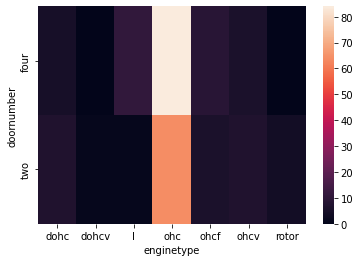

In [ ]:
sns.heatmap(pd.crosstab(df['doornumber'],df['enginetype']))
plt.show()

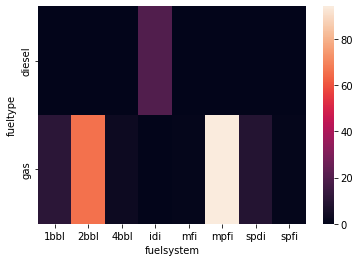

In [ ]:
sns.heatmap(pd.crosstab(df['fueltype'],df['fuelsystem']))
plt.show()

#Feature Engineering

####missing values

In [ ]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

###detecting outlier

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


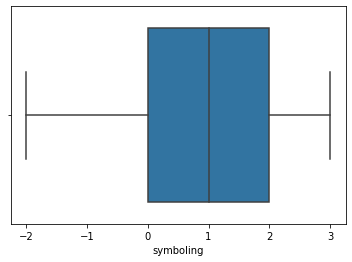

In [ ]:
sns.boxplot(df['symboling'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


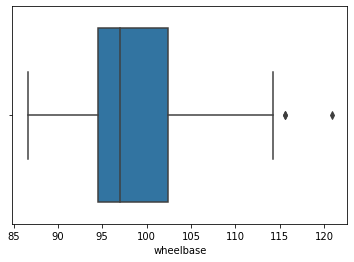

In [ ]:
sns.boxplot(df['wheelbase'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


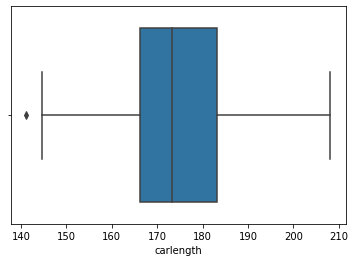

In [ ]:
sns.boxplot(df['carlength'])

####iqr method

In [ ]:
p0 = df['wheelbase'].min()
p100 = df['wheelbase'].max()
q3 = df['wheelbase'].quantile(0.75)
q1 = df['wheelbase'].quantile(0.25)
iqr = q3 - q1

In [ ]:
p0,p100,q3,q1

(86.6, 120.9, 102.4, 94.5)

In [ ]:
lc = q1 - 1.5*iqr
uc = q3 + 1.5*iqr

In [ ]:
lc,uc

(82.64999999999999, 114.25000000000001)

In [ ]:
p0,p100,q3,q1,iqr,lc,uc

(86.6,
 120.9,
 102.4,
 94.5,
 7.900000000000006,
 82.64999999999999,
 114.25000000000001)

In [ ]:
df['wheelbase'].clip(upper=uc,inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


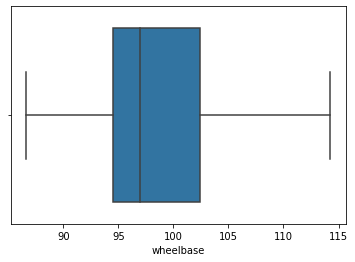

In [ ]:
sns.boxplot(df['wheelbase'])

In [ ]:
p0 = df['carlength'].min()
p100 = df['carlength'].max()
q3 = df['carlength'].quantile(0.75)
q1 = df['carlength'].quantile(0.25)
iqr = q3 - q1

In [ ]:
uc = q3 + 1.5*iqr
lc = q1 - 1.5*iqr

In [ ]:
uc,lc

(208.29999999999995, 141.10000000000002)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


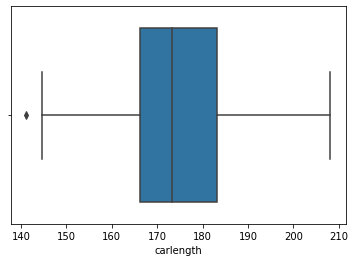

In [ ]:
sns.boxplot(df['carlength'])

In [ ]:
df['carlength'].clip(lower=lc,inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


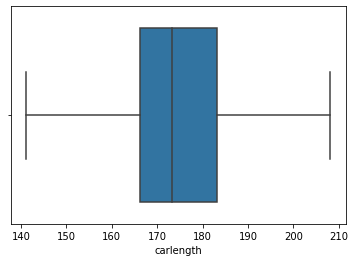

In [ ]:
sns.boxplot(df['carlength'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


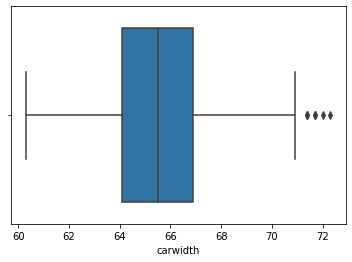

In [ ]:
sns.boxplot(df['carwidth'])

In [ ]:
p0 = df['carwidth'].min()
p100 = df['carwidth'].max()
q3 = df['carwidth'].quantile(0.75)
q1 = df['carwidth'].quantile(0.25)
iqr = q3 - q1

In [ ]:
uc = q3 + 1.5*iqr
lc = q1 - 1.5*iqr

In [ ]:
df['carwidth'].clip(upper=uc,inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


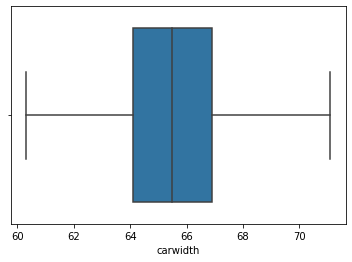

In [ ]:
sns.boxplot(df['carwidth'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


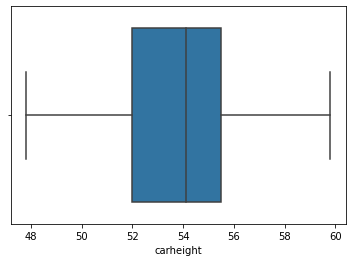

In [ ]:
sns.boxplot(df['carheight'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


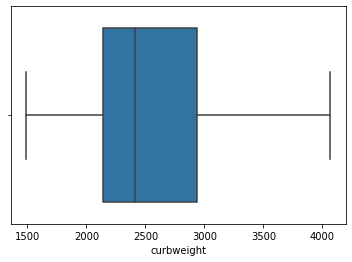

In [ ]:
sns.boxplot(df['curbweight'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


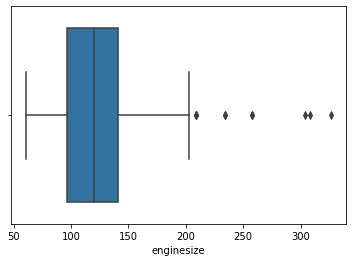

In [ ]:
sns.boxplot(df['enginesize'])

In [ ]:
p0 = df['enginesize'].min()
p100 = df['enginesize'].max()
q3 = df['enginesize'].quantile(0.75)
q1 = df['enginesize'].quantile(0.25)
iqr = q3 - q1

In [ ]:
uc = q3 + 1.5*iqr
lc = q1 - 1.5*iqr

In [ ]:
df['enginesize'].clip(upper=uc,inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


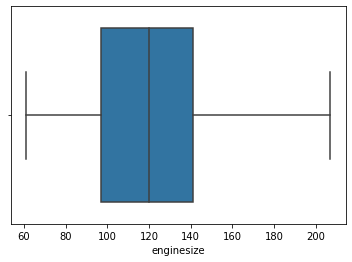

In [ ]:
sns.boxplot(df['enginesize'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


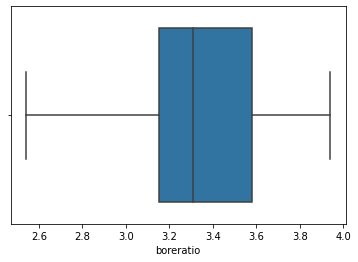

In [ ]:
sns.boxplot(df['boreratio'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


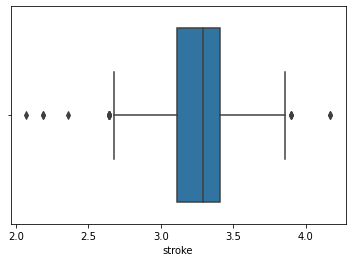

In [ ]:
sns.boxplot(df['stroke'])

In [ ]:
p0 = df['stroke'].min()
p100 = df['stroke'].max()
q3 = df['stroke'].quantile(0.75)
q1 = df['stroke'].quantile(0.25)
iqr = q3 - q1

In [ ]:
uc = q3 + 1.5*iqr
lc = q1 - 1.5*iqr

In [ ]:
df['stroke'].clip(upper=uc,lower=lc,inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


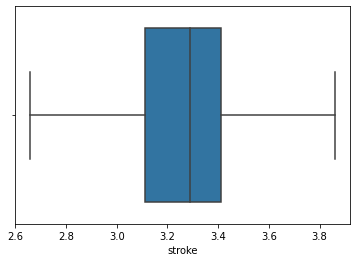

In [ ]:
sns.boxplot(df['stroke'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


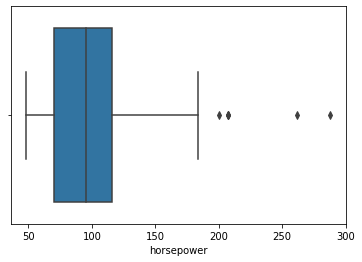

In [ ]:
sns.boxplot(df['horsepower'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


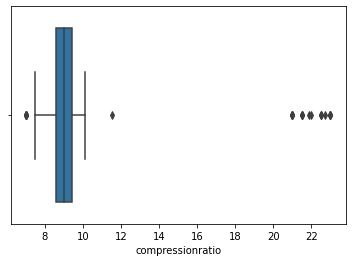

In [ ]:
sns.boxplot(df['compressionratio'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


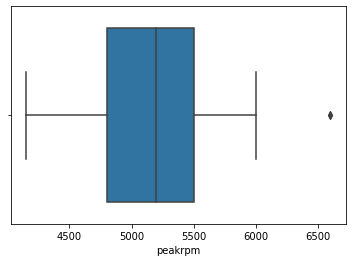

In [ ]:
sns.boxplot(df['peakrpm'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


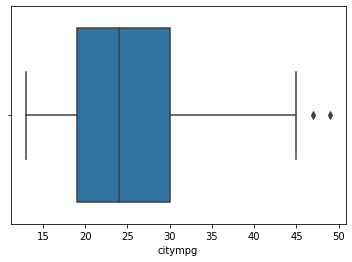

In [ ]:
sns.boxplot(df['citympg'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


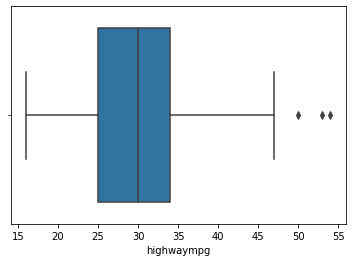

In [ ]:
sns.boxplot(df['highwaympg'])

In [ ]:
p0 = df['horsepower'].min()
p100 = df['horsepower'].max()
q3 = df['horsepower'].quantile(0.75)
q1 = df['horsepower'].quantile(0.25)
iqr = q3 - q1

In [ ]:
uc = q3 + 1.5*iqr
lc = q1 - 1.5*iqr

In [ ]:
df['horsepower'].clip(upper=uc,lower=lc,inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


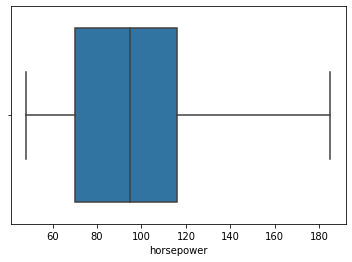

In [ ]:
sns.boxplot(df['horsepower'])

In [ ]:
p0 = df['compressionratio'].min()
p100 = df['compressionratio'].max()
q3 = df['compressionratio'].quantile(0.75)
q1 = df['compressionratio'].quantile(0.25)
iqr = q3 - q1

In [ ]:
uc = q3 + 1.5*iqr
lc = q1 - 1.5*iqr

In [ ]:
df['compressionratio'].clip(upper=uc,lower=lc,inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


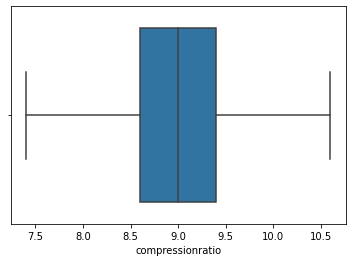

In [ ]:
sns.boxplot(df['compressionratio'])

In [ ]:
p0 = df['peakrpm'].min()
p100 = df['peakrpm'].max()
q3 = df['peakrpm'].quantile(0.75)
q1 = df['peakrpm'].quantile(0.25)
iqr = q3 - q1

In [ ]:
uc = q3 + 1.5*iqr
lc = q1 - 1.5*iqr

In [ ]:
df['peakrpm'].clip(upper=uc,lower=lc,inplace=True)

In [ ]:
p0 = df['citympg'].min()
p100 = df['citympg'].max()
q3 = df['citympg'].quantile(0.75)
q1 = df['citympg'].quantile(0.25)
iqr = q3 - q1

In [ ]:
uc = q3 + 1.5*iqr
lc = q1 - 1.5*iqr

In [ ]:
df['citympg'].clip(upper=uc,lower=lc,inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


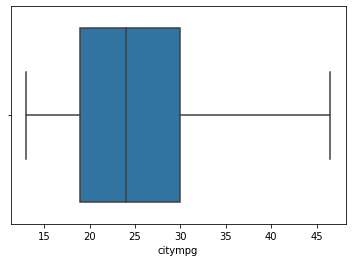

In [ ]:
sns.boxplot(df['citympg'])

In [ ]:
p0 = df['highwaympg'].min()
p100 = df['highwaympg'].max()
q3 = df['highwaympg'].quantile(0.75)
q1 = df['highwaympg'].quantile(0.25)
iqr = q3 - q1

In [ ]:
uc = q3 + 1.5*iqr
lc = q1 - 1.5*iqr

In [ ]:
df['highwaympg'].clip(upper=uc,lower=lc,inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


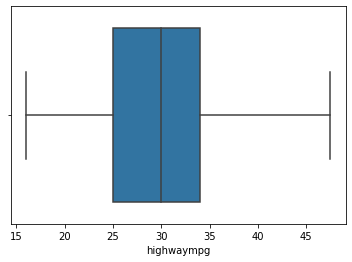

In [ ]:
sns.boxplot(df['highwaympg'])

####encoding techniques

In [ ]:
for i in df.columns:
  print(df[i].value_counts())

1      1
142    1
132    1
133    1
134    1
      ..
72     1
73     1
74     1
75     1
205    1
Name: car_ID, Length: 205, dtype: int64
 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64
toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: CarName, Length: 147, dtype: int64
gas       185
diesel     20
Name: fueltype, dtype: int64
std      168
turbo     37
Name: aspiration, dtype: int64
four    115
two      90
Name: doornumber, dtype: int64
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64
fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64
front    202
rear       3
Name: enginelocation, dtype: int64
94.50     21
93.70     20
95.70     13

In [ ]:
cat1 = cat.iloc[:,1:]

In [ ]:
pd.get_dummies(cat.iloc[:,1])

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
200,0,1
201,0,1
202,0,1
203,1,0


####label encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()

In [ ]:
df['fueltype'] = le.fit_transform(df['fueltype'])

In [ ]:
df['aspiration'] = le.fit_transform(df['aspiration'])

In [ ]:
df['doornumber'] = le.fit_transform(df['doornumber'])

In [ ]:
df['enginelocation'] = le.fit_transform(df['enginelocation'])

####one hot encodding

In [ ]:
df_carbody = pd.get_dummies(df['carbody'],drop_first=True)

In [ ]:
df = pd.concat([df,df_carbody],axis=1)

In [ ]:
df_drivewheel = pd.get_dummies(df['drivewheel'],drop_first=True)

In [ ]:
df = pd.concat([df,df_drivewheel],axis=1)

In [ ]:
df_enginetype = pd.get_dummies(df['enginetype'],drop_first=True)

In [ ]:
df = pd.concat([df,df_enginetype],axis=1)

In [ ]:
df_cylindernumber = pd.get_dummies(df['cylindernumber'],drop_first=True)

In [ ]:
df = pd.concat([df,df_cylindernumber],axis=1)

In [ ]:
df_fuelsystem = pd.get_dummies(df['fuelsystem'],drop_first=True)

In [ ]:
df = pd.concat([df,df_fuelsystem],axis=1)

In [ ]:
df.drop(columns=['CarName','carbody','drivewheel','enginetype','cylindernumber','fuelsystem'],inplace=True)

In [ ]:
df.shape

(205, 45)

In [ ]:
df.drop(columns = ['stroke','compressionratio','peakrpm'],inplace=True)

####train test split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x = df.drop(columns='price')
y = df['price']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split (x,y,random_state=0)

####standardization

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()

In [ ]:
x_train = sc.fit_transform(x_train)

In [ ]:
x_test = sc.fit_transform(x_test)

###model training and testing

####linear regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
lr.score(x_train,y_train)

0.9517212860298304

In [ ]:
lr.score(x_test,y_test)

0.832037399241668

#####svm

In [ ]:
from sklearn.svm import SVR

In [ ]:
svr = SVR()

In [ ]:
svr.fit(x_train,y_train)

SVR()

In [ ]:
svr.score(x_train,y_train)

-0.13943571203947314

In [ ]:
svr.score(x_test,y_test)

-0.1295886515576199

#####decision tree without standardization

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
dtr = DecisionTreeRegressor()

In [ ]:
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

In [ ]:
dtr.score(x_train,y_train)

1.0

In [ ]:
dtr.score(x_test,y_test)

0.8721564921804726

####decision tree with standardization

In [ ]:
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

In [ ]:
dtr.score(x_train,y_train)

1.0

In [ ]:
dtr.score(x_test,y_test)

0.8450705755369248